# Week 3: Classifying Texts

POP77142 Quantitative Text Analysis for Social Scientists

Tom Paskhalis

## Overview

-   Bag-of-words
-   Document-Term Matrix
-   Dictionaries
-   Text classification

# Bag-of-words

## Quantifying Texts

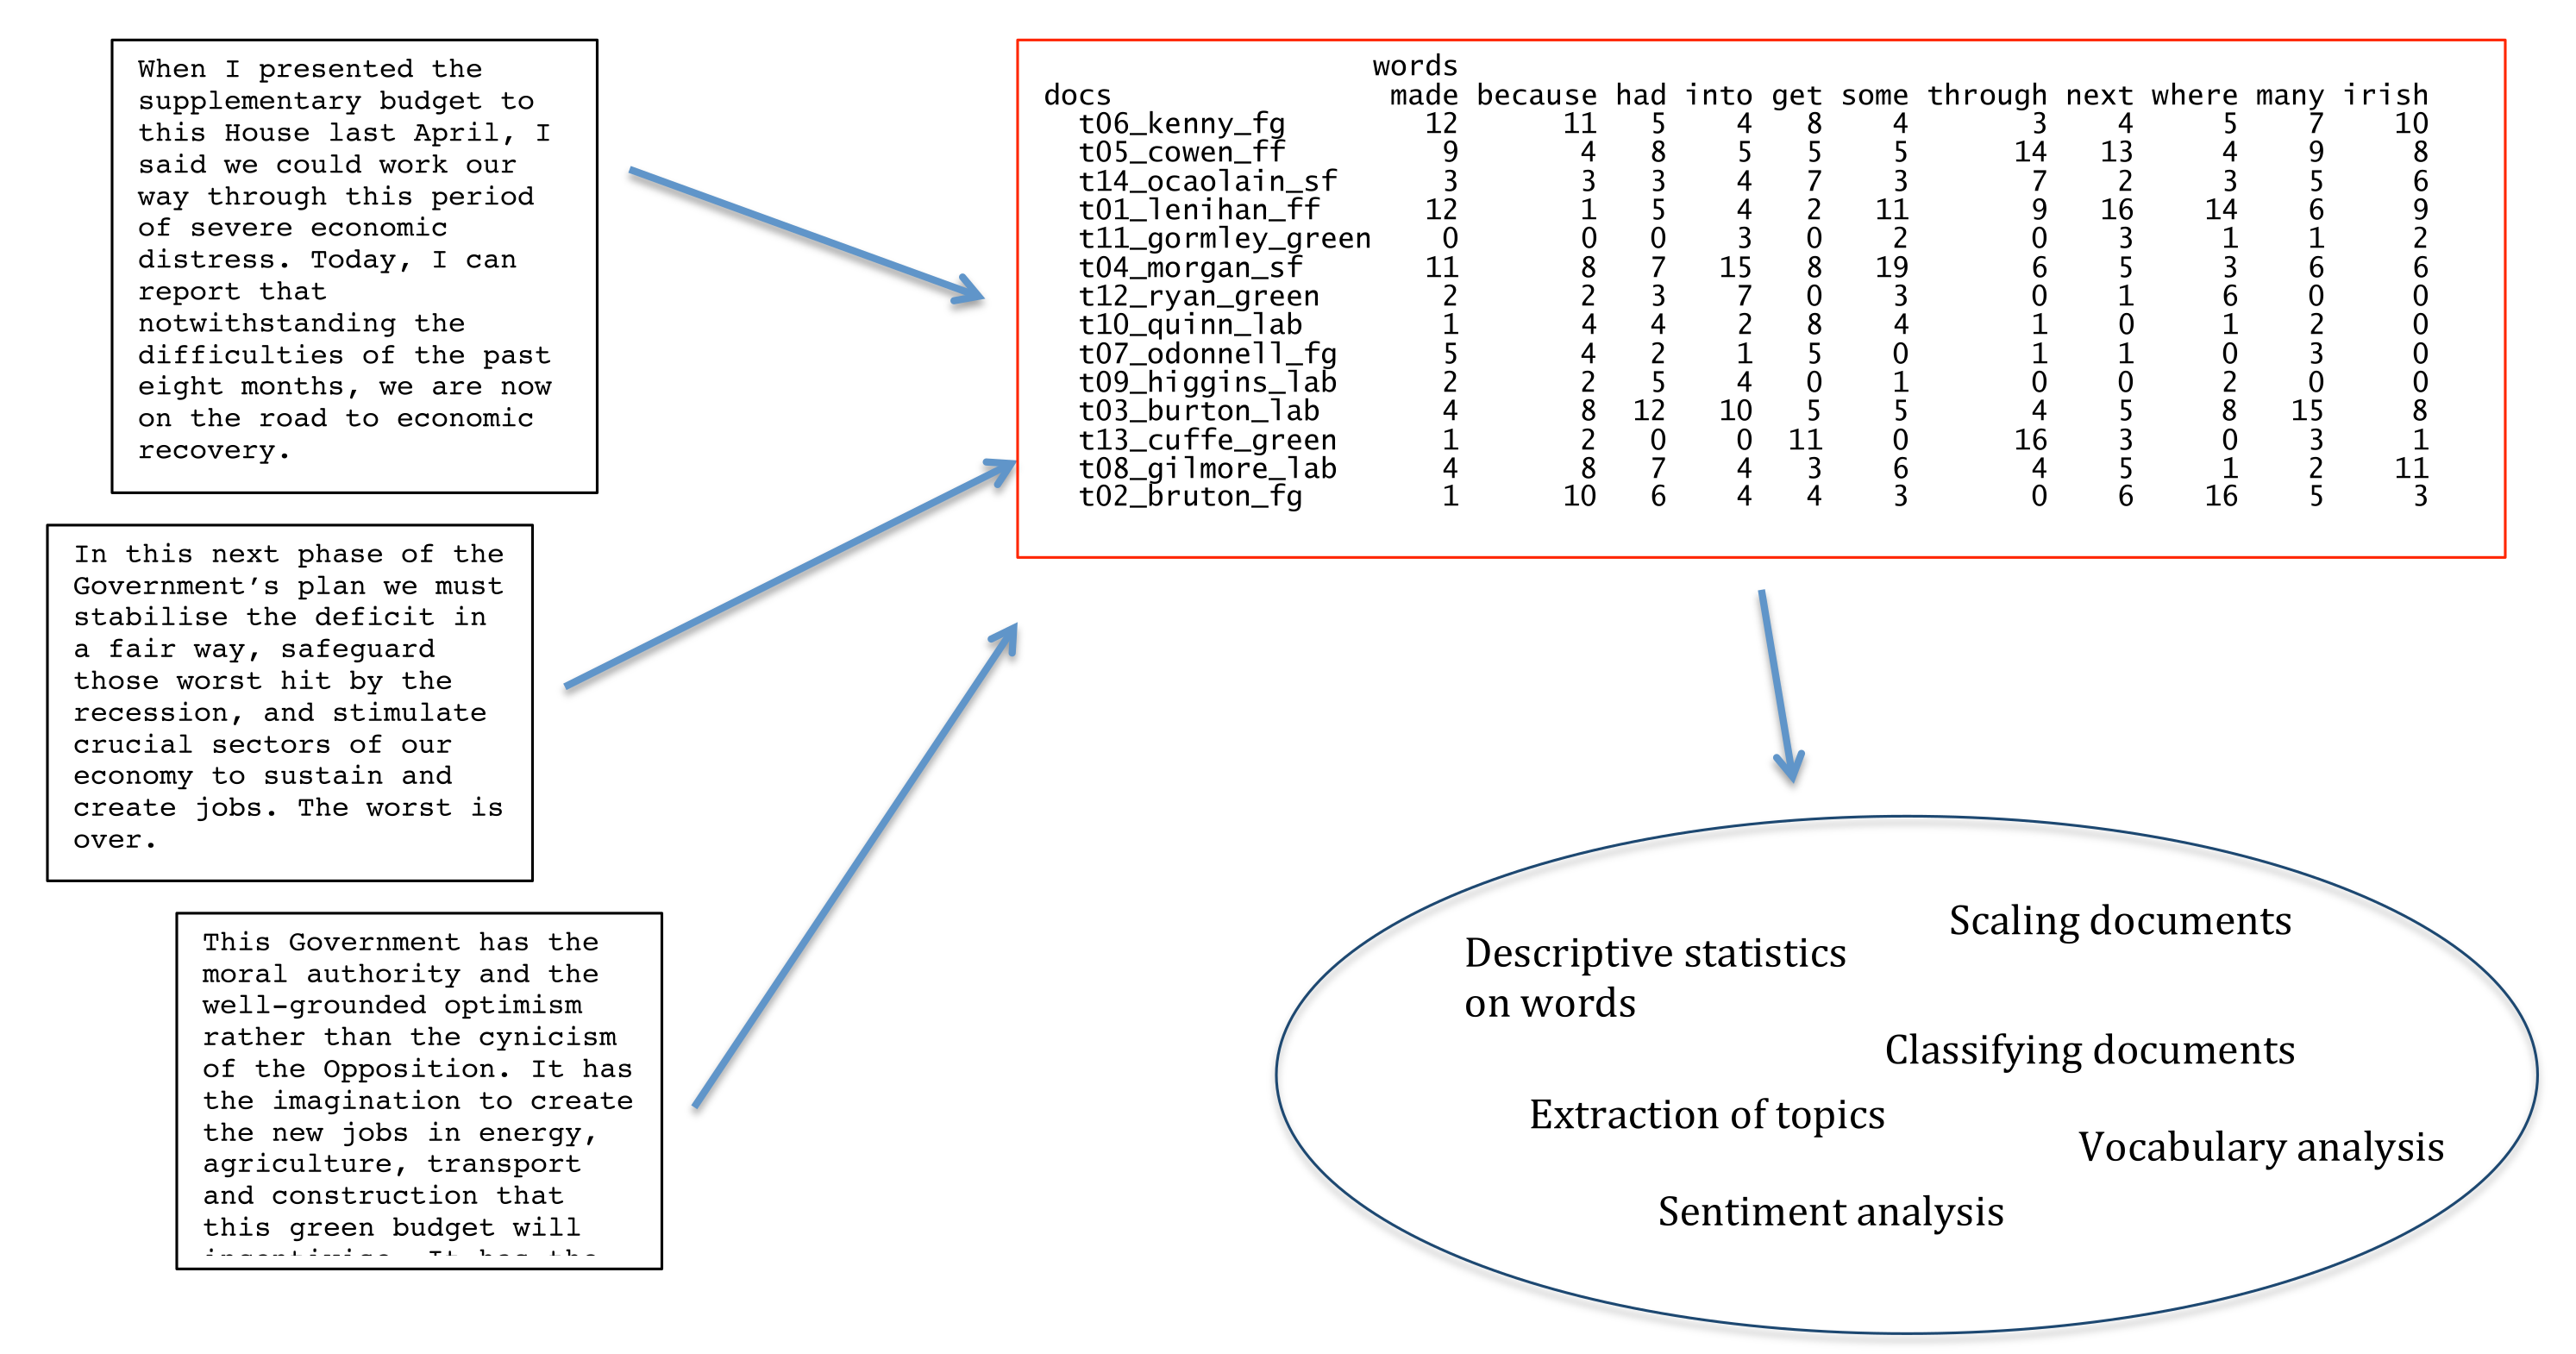

## Tokenization

-   Previously, we *tokenized* a single text:

In [ ]:
text <- "The quick brown fox jumps over the lazy dog."
tokens <- quanteda::tokens(text)
tokens

Tokens consisting of 1 document.
text1 :
 [1] "The"   "quick" "brown" "fox"   "jumps" "over"  "the"   "lazy"  "dog"  
[10] "."    

-   But what if we have multiple texts?

## Document-Term Matrix (DTM)

-   Imagine in addition to the text above, we have another one:

In [ ]:
text2 <- "The quick brown fox jumps over the lazy cat."

. . .

-   If we were to create a **document-term matrix (DTM)**, it would look
    like this:

| Document | brown | cat | dog | fox | jumps | lazy | over | quick | the |
|:--------:|:-----:|:---:|:---:|:---:|:-----:|:----:|:----:|:-----:|:---:|
|    1     |   1   |  0  |  1  |  1  |   1   |  1   |  1   |   1   |  2  |
|    2     |   1   |  1  |  0  |  1  |   1   |  1   |  1   |   1   |  2  |

-   Where each row corresponds to a document and each column to a token.

## DTM

-   In real life the documents are unlikely to have as much overlap.

. . .

-   A more realistic example of 2 texts would be something like this:

In [ ]:
speech1 <- "I thank the Deputy."
speech2 <- "Deputy, please resume your seat."

. . .

-   If we we were to create a document-term matrix, it would look like
    this:

| Document | deputy |  i  | please | resume | seat | thank | the | your |
|:--------:|:------:|:---:|:------:|:------:|:----:|:-----:|:---:|:----:|
|    1     |   1    |  1  |   0    |   0    |  0   |   1   |  1  |  0   |
|    2     |   1    |  0  |   1    |   1    |  1   |   0   |  0  |  1   |

. . .

-   This is quite a few zeros!

## Sparse Matrix

-   In practice, DTMs are often stored as **sparse matrices**.
-   Such matrix only stores non-zero values and their positions.

. . .

In [ ]:
library("Matrix")
sm <- Matrix::sparseMatrix(
  i = c(1, 1, 1, 1, 2, 2, 2, 2, 2),
  j = c(1, 2, 6, 7, 1, 3, 4, 5, 8),
  x = c(1, 1, 1, 1, 1, 1, 1, 1, 1),
  dims = c(2, 8),
  dimnames = list(
    c("Doc1", "Doc2"),
    c("deputy", "i", "please", "resume", "seat", "thank", "the", "your"))
)
sm

2 x 8 sparse Matrix of class "dgCMatrix"
     deputy i please resume seat thank the your
Doc1      1 1      .      .    .     1   1    .
Doc2      1 .      1      1    1     .   .    1

. . .

-   Of course, we will not be creating these matrices manually.

## DTM in R

-   In R we can use the `quanteda` package to create DTMs.
-   Note, it uses **document-feature matrix (DFM)** term.

. . .

-   We start by tokenising our small corpus:

In [ ]:
speeches <- c(speech1, speech2)
speeches_toks <- quanteda::tokens(tolower(speeches), remove_punct = TRUE)
speeches_toks

Tokens consisting of 2 documents.
text1 :
[1] "i"      "thank"  "the"    "deputy"

text2 :
[1] "deputy" "please" "resume" "your"   "seat"  

. . .

-   Then we create a DFM:

In [ ]:
speeches_dfm <- quanteda::dfm(speeches_toks)
speeches_dfm

Document-feature matrix of: 2 documents, 8 features (43.75% sparse) and 0 docvars.
       features
docs    i thank the deputy please resume your seat
  text1 1     1   1      1      0      0    0    0
  text2 0     0   0      1      1      1    1    1

## Bag of Words

-   This representation of text is also known as **bag-of-words**.
-   The key aspects of this approach are:
    -   Single words are considered as relevant *features* of each
        document.
    -   Documents are quantified by counting occurrences of words.
    -   Word order is ignored.
    -   Grammar and syntax are discarded.

## Why Bag of Words?

-   Simple.
-   Efficient.
-   Works well in many cases.
-   Can be extended (co-occurrences aka “n-grams”)
-   Has been extensively used and validated in social sciences.
-   Of course, there are cases when word order matters (e.g. text
    reuse).

# Dictionaries

## Word Meanings

-   Words have meanings 🧐
-   This allows us to take word usage as a proxy for the overall
    ‘meaning’ of a text.
-   Certain kinds of words indicate certain kind of ‘meanings’.
-   Kinds of ‘meanings’:
    -   Sentiment (e.g. positive, negative, etc.)
    -   Emotions (e.g. anger, sad, happiness, etc.)
    -   Topics (e.g. politics, sports, etc.)
    -   Ideology (e.g. liberal, conservative, etc.)
    -   Hate speech (e.g. sexism, homophobia, xenophobia, etc.)

## Dictionaries

-   **Automated dictionary methods (ADM)** exploit word usage to learn
    the ‘meanings’ of texts.
-   Two steps:
    1.  **Dictionary creation**: Define a list of words that represent a
        certain ‘meaning’.
    2.  **Dictionary application**: Count the number of words in a text
        that are in the dictionary.
-   Dictionaries should be task-appropriate and validated.

## Dictionary Structure

-   We have seen dictionaries in the context of Python:

In [ ]:
ideo_dict = {
  "liberal": ["benefits", "worker", "trade union"],
  "conservative": ["restriction", "immigration", "reduction"]
  }

. . .

-   Essentially, a dictionary is a set of **key-value pairs**.
-   In the context of text analysis:
    -   **Keys** - labels for equivalence classes for the concept of
        interest.
    -   **Values** - terms or patterns that are declared equivalent
        occurrences of the key class

## Dictionary vs Thesaurus

-   A *dictionary* in a QTA sense is somewhat of a misnomer.
-   Substantively, a dictionary is closer to a *thesaurus*.
-   I.e. a list of canonical terms or concepts (‘keys’) associated with
    a list of synonyms.
-   But unlike thesauruses, ADM dictionaries:
    -   tend to be ‘exclusive’ (each value is associated with one key
        only)
    -   do not always identify synonyms

## Qualitative & Quantitative Text Analysis

-   ADM dictionaries sit somewhere between more qualitative and fully
    automated approaches to text analysis.
-   It is ‘qualitative’ in a sense that it requires identification of
    concepts and textual features associated with each of them.
-   Dictionary construction involves a lot of contextual interpretation
    and qualitative judgment
-   At the same time the application part is fully automated and
    perfectly reliable/replicable.

## Some Famous Dictionaries

-   [**General
    Inquirer**](https://inquirer.sites.fas.harvard.edu/spreadsheet_guide.htm)
    ([Stone et
    al. 1966](https://psycnet.apa.org/record/1967-04539-000)): an early
    all-purpose dictionary (e.g. sentiment analysis) in general texts.

-   [**Regressive Imagery
    Dictionary**](http://www.kovcomp.co.uk/wordstat/RID.html): designed
    to measure primordial vs. conceptual thinking.

-   [**Linguistic Inquiry and Word Count
    (LIWC)**](https://www.liwc.app/) (Pennebaker et al. 2001): large
    (paid) dictionary for many psychological and related concepts.

## Example: LexiCoder

-   The **LexiCoder Sentiment Dictionary** ([Young and Soroka
    2012](https://doi.org/10.1080/10584609.2012.671234)): a dictionary
    for sentiment analysis in political texts, validated with
    human-coded news content.

. . .

In [ ]:
data("data_dictionary_LSD2015", package = "quanteda")

. . .

In [ ]:
str(data_dictionary_LSD2015)

Formal class 'dictionary2' [package "quanteda"] with 2 slots
  ..@ .Data:List of 4
  .. ..$ :List of 1
  .. .. ..$ : chr [1:2858] "a lie" "abandon*" "abas*" "abattoir*" ...
  .. ..$ :List of 1
  .. .. ..$ : chr [1:1709] "ability*" "abound*" "absolv*" "absorbent*" ...
  .. ..$ :List of 1
  .. .. ..$ : chr [1:1721] "best not" "better not" "no damag*" "no no" ...
  .. ..$ :List of 1
  .. .. ..$ : chr [1:2860] "not a lie" "not abandon*" "not abas*" "not abattoir*" ...
  ..@ meta :List of 3
  .. ..$ system:List of 5
  .. .. ..$ package-version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 1 9 9009
  .. .. ..$ r-version      :Classes 'R_system_version', 'package_version', 'numeric_version'  hidden list of 1
  .. .. .. ..$ : int [1:3] 3 6 2
  .. .. ..$ system         : Named chr [1:3] "Darwin" "x86_64" "kbenoit"
  .. .. .. ..- attr(*, "names")= chr [1:3] "sysname" "machine" "user"
  .. .. ..$ directory      : chr "/Users/kbenoit/Dropbox (Personal)/G

## Example: Laver and Garry (2000)

-   A *hierarchical* set of categories to distinguish policy domains and
    policy positions.
-   Derived from one of the longest content analysis exercises in
    political science - [Manifesto
    Project](https://manifesto-project.wzb.eu/) (previously known as
    CMP).
-   Five domains at the top level of hierarchy:
    -   economy
    -   political system
    -   social system
    -   external relations
    -   “general” domain
-   The dictionary was developed on a set of specific UK manifestos.

> **Extra**
>
> ([Laver & Garry, 2000](https://doi.org/10.2307/2669268))

## Example: Laver and Garry (2000)

-   An accompanying `quanteda.dictionaries` package contains a lot of
    mentioned dictionaries, including the Laver and Garry (2000)
    dictionary.
-   Alternatively, you can download the ‘raw’ dictionary as text
    from<br> <https://provalisresearch.com/Download/LaverGarry.zip>

. . .

In [ ]:
# The package is not available on CRAN,
# so need to install it from GitHub
remotes::install_github("kbenoit/quanteda.dictionaries")

. . .

In [ ]:
data("data_dictionary_LaverGarry", package = "quanteda.dictionaries")

. . .

In [ ]:
str(data_dictionary_LaverGarry)

Formal class 'dictionary2' [package "quanteda"] with 2 slots

"dictionary2"

  ..@ concatenator: chr " "
  ..@ names       : chr [1:9] "CULTURE" "ECONOMY" "ENVIRONMENT" "GROUPS" ...
  ..@ .Data       :List of 9
  .. ..$ :List of 4
  .. .. ..$ CULTURE-HIGH   :List of 1
  .. .. .. ..$ : chr [1:8] "art" "artistic" "dance" "galler*" ...
  .. .. ..$ CULTURE-POPULAR:List of 1
  .. .. .. ..$ : chr "media"
  .. .. ..$ SPORT          :List of 1
  .. .. .. ..$ : chr "angler*"
  .. .. ..$                : chr [1:3] "people" "war_in_iraq" "civil_war"
  .. ..$ :List of 3
  .. .. ..$ +STATE+:List of 1
  .. .. .. ..$ : chr [1:50] "accommodation" "age" "ambulance" "assist" ...
  .. .. ..$ =STATE=:List of 1
  .. .. .. ..$ : chr [1:71] "accountant" "accounting" "accounts" "advert*" ...
  .. .. ..$ -STATE-:List of 1
  .. .. .. ..$ : chr [1:62] "assets" "autonomy" "barrier*" "bid" ...
  .. ..$ :List of 2
  .. .. ..$ CON ENVIRONMENT:List of 1
  .. .. .. ..$ : chr "produc*"
  .. .. ..$ PRO ENVIRONMENT:List of 1
  .. .. .. ..$ : chr [1:28] "car" "catalytic" "chemical*" "chimney*" ...

## Example: Dictionary Application

-   Imagine we want to know which of the parties discusses immigration
    the most in their electoral manifesto.
-   We can start by creating a very simple dictionary to answer this
    question:

. . .

In [ ]:
imm_dict <- quanteda::dictionary(list(
  immigration = c("asylum*", "border*", "immigra*", "migrant*", "refugee*")
))

. . .

In [ ]:
manifestos <- readr::read_csv("../data/ireland_ge_2024_manifestos.csv")

Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): party, text
dbl (1): year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

. . .

In [ ]:
manifestos_toks <- quanteda::tokens(
  manifestos$text,
  remove_punct = TRUE,
  remove_numbers = TRUE,
  remove_symbols = TRUE
)

## Example: Dictionary Application

-   Now we can apply the dictionary to the manifestos:

. . .

In [ ]:
manifestos_imm <- quanteda::dfm(
  quanteda::tokens_lookup(manifestos_toks, dictionary = imm_dict)
)

. . .

In [ ]:
manifestos_imm

Document-feature matrix of: 9 documents, 1 feature (0.00% sparse) and 0 docvars.
       features
docs    immigration
  text1          53
  text2          24
  text3          32
  text4          24
  text5          31
  text6          31
[ reached max_ndoc ... 3 more documents ]

## Calculating Quantities of Interest

-   Of course, the absolute number of matched terms is not, necessarily,
    informative.

. . .

-   In the immigration focus example we can use the total number of
    matched terms $M_i$ divided by the total number of words in the
    document $N_i$:

$$
\text{immigration_focus}_i = \frac{M_i}{N_i}
$$

. . .

-   If we were to try to scale the manifestos as pro- or anti-
    immigration (assuming we had a relevant dictionary), we could then
    try something like:

$$
\text{immigration_position}_i = \frac{M^{anti}_i - M^{pro}_i}{N_i}
$$

. . .

-   In other words, we would calculate an absolute proportional
    difference.

## Scaling

-   The previously described approach was used extensively in [Manifesto
    Project](https://manifesto-project.wzb.eu/).
-   The problems, however, are:
    -   Addition of irrelevant content shifts the scale toward zero.
    -   Assumes the additional mentions increase emphasis in a linear
        scale

. . .

-   One alternative ([Laver & Garry,
    2000](https://doi.org/10.2307/2669268)):

$$
\text{immigration_position}_i = \frac{M^{anti}_i - M^{pro}_i}{M^{anti}_i + M^{pro}_i}
$$

. . .

-   Another alternative ([Lowe, Benoit, Mikhaylov & Laver,
    2011](https://doi.org/10.1111/j.1939-9162.2010.00006.x)):

$$
\text{immigration_position}_i = \log{\frac{M^{anti}_i}{M^{pro}_i}}
$$

## Example: Dictionary Application

In [ ]:
immigration_focus <- cbind(
  manifestos,
  quanteda::convert(manifestos_imm, to = "data.frame")
) |>
  (\(df) transform(df, ntokens = quanteda::ntoken(manifestos_toks)))() |>
  (\(df) transform(df, rel_imm = immigration/ntokens))() |>
  _[, c("party", "immigration", "ntokens", "rel_imm")] |>
  (\(df) `[`(df, order(df$rel_imm, decreasing = TRUE),))()

. . .

In [ ]:
immigration_focus

      party immigration ntokens      rel_imm
text5    II          31    7295 0.0042494859
text7   PBP          26   11976 0.0021710087
text1    AO          53   27749 0.0019099787
text4    GR          24   29110 0.0008244589
text2    FF          24   33676 0.0007126737
text8    SD          36   58281 0.0006176970
text3    FG          32   52942 0.0006044350
text9    SF          28   48813 0.0005736177
text6   LAB          31   63107 0.0004912292

## What to Do with Dictionary Results

-   Describe the results.
-   Scale the results (neg. vs pos., pro vs anti, left vs right, etc.).
-   Could be used as features in downstream tasks:
    -   Similarity measures (e.g. cosine)
    -   ML-based classification
    -   Topic modelling (seeded with keywords)
    -   Prompt engineering for generative AI

## How to Build a Dictionary

1.  Identify “extreme” texts with known positions.

-   E.g. opposition leader and PM, one-star and five-star reviews, etc.

1.  Search for differentially occurring words using word frequencies.
2.  Examine these words in context to assess their sensitivity and
    specificity.
3.  Examine inflected forms to see whether stemming or wildcarding is
    required.
4.  Use these words (or stems/lemmas) for categories.

## Dictionary Performance

<figure>
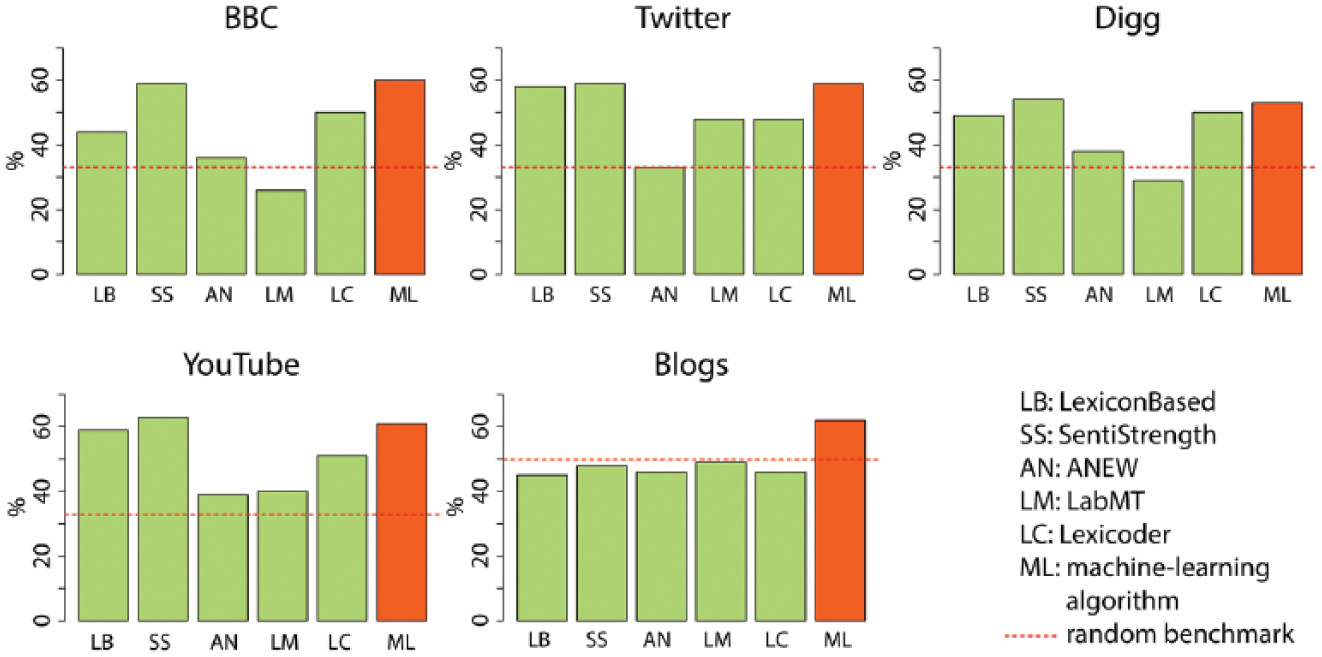
<figcaption aria-hidden="true"><a
href="https://doi.org/10.1177/0002716215569192">(González-Bailón &amp;
Paltoglou, 2015)</a></figcaption>
</figure>

## Dictionary vs Machine Learning

<figure>

<figcaption aria-hidden="true"><a
href="https://doi.org/10.1017/pan.2020.8">(Barberá, Boydstun, Linn,
McMahon &amp; Nagler, 2021)</a></figcaption>
</figure>

## Next

-   Tutorial: Dictionaries and text classification
-   Next week: Modelling texts